Que 1. What is Boosting in Machine Learning? Explain how it improves weak learners.
- Boosting in machine learning is an ensemble technique that sequentially combines multiple simple "weak" models (like decision stumps) into a single, powerful "strong" model, where each new model focuses on correcting the errors of its previous models by increasing the weight of misclassified data points, thereby reducing overall bias and improving predictive accuracy.  

- **How Boosting Improves Weak Learners:**
    - **Sequential Training:** Unlike bagging (where models train independently), boosting trains models one after another, with each new learner learning from the mistakes of the last.
    - **Error Correction:** If a data point is misclassified by the current model, its weight is increased, making it more important for the next model to get right.
    - **Focus on Difficult Examples:** This weighting process forces subsequent weak learners to focus on the "hard" or complex parts of the data that previous models struggled with.
    - **Weighted Combination:** The final strong model is a weighted sum or vote of all the weak learners, giving more influence to models that performed better.

Que 2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
- AdaBoost focuses on misclassified data by increasing weights of hard-to-classify samples, training subsequent models (decision tree stumps) to correct these specific errors. AdaBoost minimizes classification error (exponential loss) by adapting sample weights. AdaBoost is more sensitive to noisy data and outliers due to aggressive weighting.

- Gradient Boosting sequentially fits new models to the residual errors (gradients) of the previous model, aiming to minimize a differentiable loss function, using techniques like learning rates (shrinkage) for robustness and potentially deeper trees. It can use more complex base learners, like deeper decision trees, not just stumps. It is less sensitive to noise due to smoothing via learning rates (shrinkage) and gradient descent.


Que 3. How does regularization help in XGBoost?
- **Prevents Overfitting:** By penalizing complex models (large weights or deep trees), it stops the model from learning the training data too closely, ensuring it performs well on unseen data.

- **Improves Generalization:** A less complex model with lower variance is better equipped to handle new data, reducing the gap between training and test performance.
- **Encourages Sparsity (L1):** L1 regularization (alpha) can drive less important feature weights to zero, effectively performing feature selection and simplifying the model.
- **Shrinks Weights (L2):** L2 regularization (lambda) shrinks weights towards zero (weight decay), making the model's predictions more conservative and reducing sensitivity to individual observations.

Que 4. Why is CatBoost considered efficient for handling categorical data?
- **Ordered Boosting Scheme:** CatBoost implements a unique "ordered" target encoding method. In traditional gradient boosting, target leakage can occur. CatBoost addresses this by creating a permutation of the dataset and calculating the target statistics (average target value for a category) using only the data points preceding the current one in the permutation. This reduces overfitting and handles categorical features efficiently without needing OHE.

- **Optimal Ordering Principle:** The algorithm uses a sorted, "ordered" system for processing data. It transforms categorical features into numerical ones on the fly during training using a specific formula that incorporates prior probabilities, reducing the need for costly preprocessing.
- **Handling High Cardinality:** For categories with many unique values (high cardinality), CatBoost groups similar categories together based on their shared characteristics and target statistics, rather than creating a massive number of binary features like OHE would. This drastically cuts down on the feature space and computation time.
- **Speed and Memory Efficiency:** By directly incorporating these encoding strategies into the learning loop and avoiding the memory overhead of OHE, CatBoost requires less RAM and is often much faster during the training phase when dealing with datasets dominated by categorical variables.

Que 5. What are some real-world applications where boosting techniques are preferred over bagging methods?
- **Fraud Detection & Anomaly Detection:** Boosting excels at finding rare fraudulent transactions or anomalies by giving more weight to misclassified (and thus suspicious) instances, making models highly sensitive to deviations from normal patterns.

- **Spam Filtering:** Boosting algorithms can identify subtle patterns in text that distinguish spam from legitimate emails, focusing on words or phrases that were previously misclassified.
- **Credit Scoring:** Predicting loan defaults (a high-bias problem where simple models fail) benefits from boosting's ability to sequentially learn complex risk factors.
- **Image & Object Recognition (Specific Cases):** While bagging (Random Forest) handles general image variance well, boosting (like AdaBoost) is used in systems like Face Detection to combine many simple features into a highly accurate detector by correcting errors.

In [8]:
# Question 6: Write a Python program to:
# Train an AdaBoost Classifier on the Breast Cancer dataset
# Print the model accuracy

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f'Accuracy Score : {accuracy_score(y_test, y_pred):.4f}')
print('\nConfusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report :')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.9708

Confusion Matrix :
[[ 61   2]
 [  3 105]]

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [13]:
# Question 7: Write a Python program to:
# Train a Gradient Boosting Regressor on the California Housing dataset
# Evaluate performance using R-squared score

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f'R-squared Score : {r2_score(y_test, y_pred):.4f}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test, y_pred):.4f}')
print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred):.4f}')

R-squared Score : 0.7803
Mean Absolute Error : 0.3714
Mean Squared Error : 0.2883


In [18]:
# Question 8: Write a Python program to:
# Train an XGBoost Classifier on the Breast Cancer dataset
# Tune the learning rate using GridSearchCV
# Print the best parameters and accuracy

from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

cls = XGBClassifier()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

print(f'Accuracy Score : {accuracy_score(y_test, y_pred):.4f}')
print('\nConfusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report :')
print(classification_report(y_test, y_pred))

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params = {'learning_rate': [0.001, 0.01, 0.05, 1.0, 0.1, 0.2]}

grid = GridSearchCV(estimator=cls, param_grid=params, cv=5, verbose=0, n_jobs=-1)
grid.fit(X_train, y_train)

final_model = grid.best_estimator_
y_pred_tuned = final_model.predict(X_test)

print('\nEvaluation After Hyperparameter Tuning')
print("Best Parameter")
print(grid.best_params_)
print(f'Accuracy Score : {accuracy_score(y_test, y_pred_tuned):.4f}')
print('\nConfusion Matrix :')
print(confusion_matrix(y_test, y_pred_tuned))
print('\nClassification Report :')
print(classification_report(y_test, y_pred_tuned))

Accuracy Score : 0.9649

Confusion Matrix :
[[ 61   2]
 [  4 104]]

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171


Evaluation After Hyperparameter Tuning
Best Parameter
{'learning_rate': 0.1}
Accuracy Score : 0.9591

Confusion Matrix :
[[ 59   4]
 [  3 105]]

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



Accuracy Score : 0.9766

Confusion Matrix :
[[ 60   3]
 [  1 107]]

Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



<Axes: >

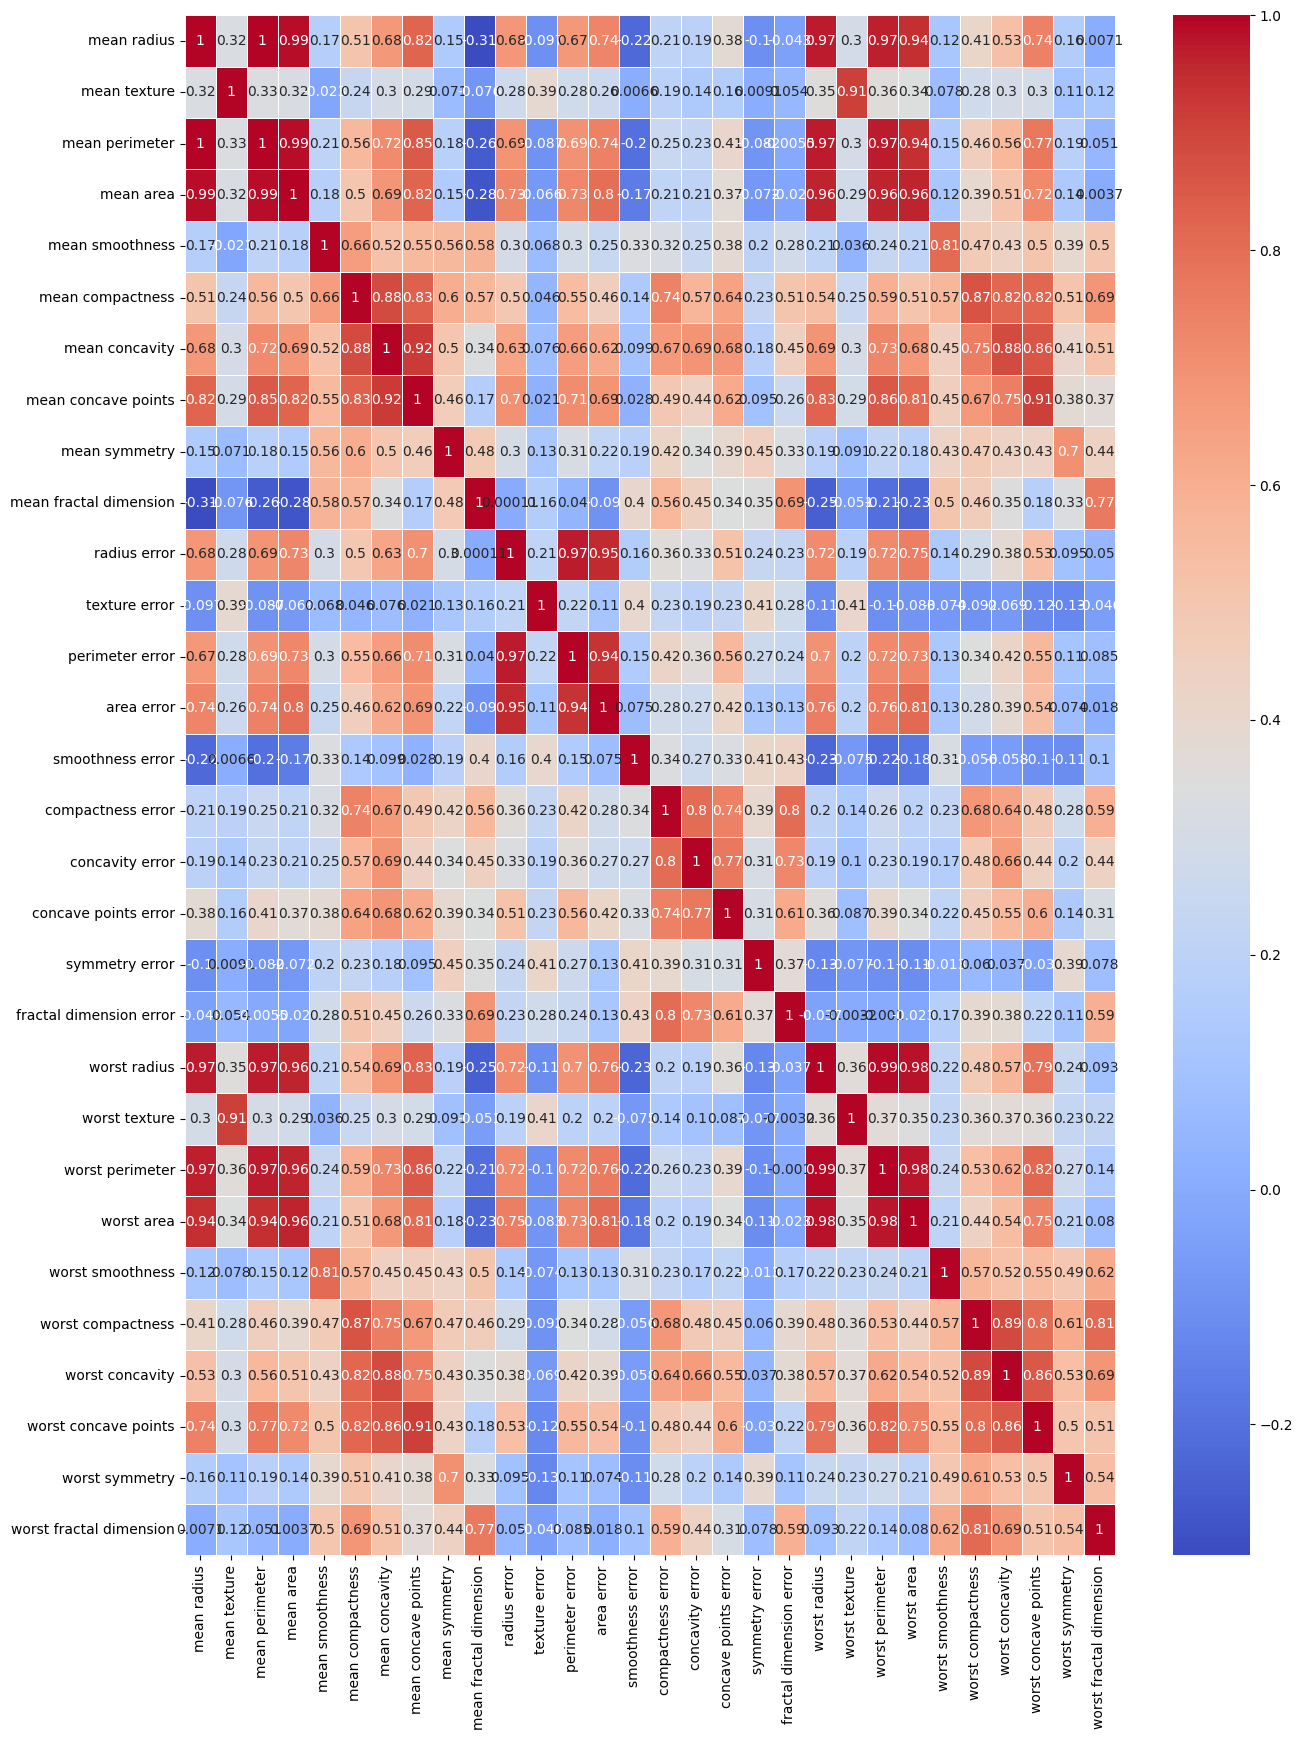

In [33]:
# Question 9: Write a Python program to:
# Train a CatBoost Classifier
# Plot the confusion matrix using seaborn

import pandas as pd
from sklearn.datasets import load_breast_cancer
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

cls = CatBoostClassifier(verbose=0)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

print(f'Accuracy Score : {accuracy_score(y_test, y_pred):.4f}')
print('\nConfusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report :')
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)

Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.  
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.  
Describe your step-by-step data science pipeline using boosting techniques:  
1. Data preprocessing & handling missing/categorical values
2. Choice between AdaBoost, XGBoost, or CatBoost
3. Hyperparameter tuning strategy
4. Evaluation metrics you'd choose and why
5. How the business would benefit from your model  

**Answer**
- **1. Data preprocessing & handling missing/categorical values :**
    - **Missing Values:** Impute numeric features with the median. Impute categorical features with the mode or a dedicated 'Unknown' category, or use model-based imputation.

    - **Encoding:** Use Target Encoding (for high cardinality) or One-Hot Encoding (for low cardinality) after imputation.
    - **Feature Scaling:** Standardize/Normalize numeric features using StandardScaler or MinMaxScaler.
    - **Imbalance Handling:** Apply SMOTE (Synthetic Minority Over-sampling Technique) to generate minority class samples or use undersampling to balance classes before model training.

- **2. Choice between AdaBoost, XGBoost, or CatBoost :**
    - **XGBoost (Extreme Gradient Boosting):** Highly efficient, regularized, great performance, but requires manual handling of categorical features (encoding) and can be sensitive to missing values.

    - **CatBoost (Categorical Boosting):** Recommended Choice. Handles categorical features natively (no manual encoding needed), excellent performance, robust, and often outperforms XGBoost on mixed-type datasets, making it ideal here.
    - **AdaBoost (Adaptive Boosting):** Simpler, uses weak learners (decision stumps), good baseline, but generally less powerful than XGBoost/CatBoost for complex tasks.

- **3. Hyperparameter tuning strategy :**
    - Use Bayesian Optimization for efficient searching, as it intelligently explores the hyperparameter space (e.g., learning_rate, n_estimators, max_depth, subsample, colsample_bytree).
    - Tune XGBoost/CatBoost parameters like iterations, depth, learning_rate, l2_leaf_reg, random_strength.

- **4. Evaluation metrics :**
    - **Precision, Recall, F1-Score, AUC-ROC, AUC-PR:** Accuracy is misleading in imbalanced datasets.

        - **Recall (Sensitivity):** Crucial for catching actual defaults (True Positives) – minimizes missed defaults.

        - **Precision:** Ensures fewer false alarms (approved loans that default) – reduces unnecessary scrutiny.
        - **AUC-PR (Area Under Precision-Recall Curve):** Best for imbalanced data, focuses on minority class performance.

- **5. Business Benefit :**
    - **Reduced Financial Loss:** Proactively identify high-risk borrowers, preventing defaults.
    - **Optimized Loan Portfolio:** Balance risk vs. reward, approve more viable loans.
    - **Improved Customer Experience:** Offer tailored products (e.g., different rates) to low-risk segments.
    
    - **Regulatory Compliance:** Better risk management for financial stability.